<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/Getting_Started_with_GHZstate_Qiskit_AerSimulator_mkbahk_20241023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [250]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1

In [251]:
%pip show qiskit qiskit_aer

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer
---
Name: qiskit-aer
Version: 0.15.1
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, psutil, qiskit, scipy
Required-by: 


In [252]:
%pip list

Package                            Version
---------------------------------- --------------------
absl-py                            1.4.0
accelerate                         0.34.2
aiohappyeyeballs                   2.4.3
aiohttp                            3.10.10
aiosignal                          1.3.1
alabaster                          0.7.16
albucore                           0.0.16
albumentations                     1.4.15
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.19.0
astropy                            6.1.4
astropy-iers-data                  0.2024.10.14.0.32.55
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread      

In [253]:
import qiskit
qiskit.__version__

'1.2.4'

In [254]:
import qiskit_aer
qiskit_aer.__version__

'0.15.1'

In [255]:
from qiskit_aer import Aer, AerSimulator, QasmSimulator, StatevectorSimulator, UnitarySimulator
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

In [256]:
Aer

In [257]:
AerSimulator()

AerSimulator('aer_simulator')

In [258]:
QasmSimulator()

QasmSimulator('qasm_simulator')

In [259]:
StatevectorSimulator()

StatevectorSimulator('statevector_simulator')

In [260]:
UnitarySimulator()

UnitarySimulator('unitary_simulator')

In [261]:
#backend =Aer.get_backend("qasm_simulator")
#backend =Aer.get_backend("aer_simulator_statevector")
#backend =Aer.get_backend("aer_simulator_unitary")
#backend = QasmSimulator()
#backend = StatevectorSimulator()
backend = UnitarySimulator()

In [262]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(3)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(0, 2)
#circuit.measure_all()  #Unitary Matrix 결과를 얻기위해서는 반드시 주석처리 필요


# The GHZ State

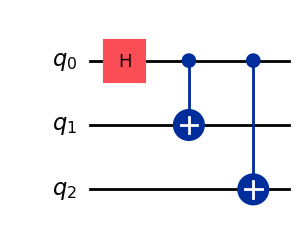

In [263]:
circuit.draw(output="mpl")

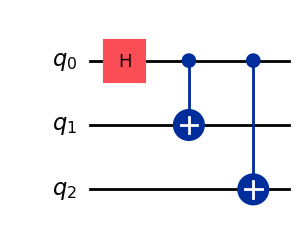

In [264]:
from qiskit.compiler import transpile, assemble
trans_qc = transpile(circuit, backend=backend)
trans_qc.draw("mpl")

In [265]:
#from qiskit.providers.jobstatus import JobStatus
#import time

#job = backend.run(trans_qc, shots=1024)

#print("Job ID is", job.job_id(),"\n")

# 제출된 잡에 대한 실행 상태 확인
#while job.status() is not JobStatus.DONE:
#	print("Job status is", job.status() )
#	time.sleep(2)
###while


#print("Job status is", job.status() )

# 결과 출력
#counts = job.result().get_counts()
#print(counts)

In [266]:
from qiskit.providers.jobstatus import JobStatus

job = backend.run(trans_qc, shots=1024)

# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: a54f0159-da90-4a4a-9711-2d8f646aaf33


In [267]:
print(job.status())

JobStatus.DONE


In [268]:
### 서비스 플렛폼에 중간에 세션이 종료되었을 경우, Job이 완료되면 그 Job.ID를 이용해 결과를 추출합니다. ###
#job = service.job("csbevjh3olk6fc8cr0n0")

In [269]:
result = job.result()
result

Result(backend_name='unitary_simulator', backend_version='0.15.1', qobj_id='', job_id='a54f0159-da90-4a4a-9711-2d8f646aaf33', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(unitary=Operator([[ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
          [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j],
          [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j,

# 진폭(Applitude)의 확률 출력하기

In [270]:
counts = result.get_counts()
counts

QiskitError: 'No counts for experiment "0"'

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(data=counts)

#상태벡터 출력하기

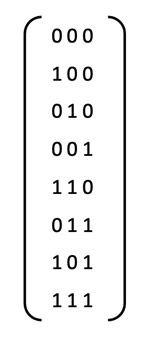

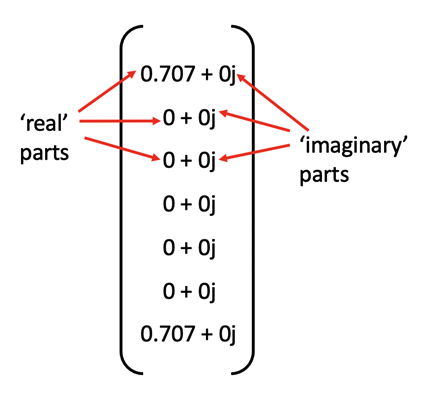

In [ ]:
statevector = result.get_statevector()
statevector

In [ ]:
from qiskit.visualization import plot_state_city
plot_state_city(statevector)

In [ ]:
unitary = result.get_unitary(trans_qc, decimals=3)
unitary

In [ ]:
from qiskit.visualization import plot_state_city
plot_state_city(unitary)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'unitary' is your unitary matrix from the provided code.

def plot_unitary_matrix(unitary):
  """Plots a unitary matrix as a heatmap."""

  # Convert the Operator object to a NumPy array
  unitary_array = unitary.data

  fig, ax = plt.subplots()
  im = ax.imshow(np.abs(unitary_array), cmap='viridis')  # Use absolute values for visualization

  # Add colorbar
  cbar = ax.figure.colorbar(im, ax=ax)
  cbar.ax.set_ylabel("Amplitude", rotation=-90, va="bottom")

  # Set axis labels
  ax.set_xticks(np.arange(len(unitary_array))) # Use unitary_array instead of unitary
  ax.set_yticks(np.arange(len(unitary_array))) # Use unitary_array instead of unitary
  ax.set_xticklabels(np.arange(len(unitary_array))) # Use unitary_array instead of unitary
  ax.set_yticklabels(np.arange(len(unitary_array))) # Use unitary_array instead of unitary

  # Rotate the tick labels and set their alignment.
  plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
           rotation_mode="anchor")

  # Loop over data dimensions and create text annotations.
  for i in range(len(unitary_array)): # Use unitary_array instead of unitary
      for j in range(len(unitary_array)): # Use unitary_array instead of unitary
          text = ax.text(j, i, round(np.abs(unitary_array[i, j]), 2), # Use unitary_array instead of unitary
                       ha="center", va="center", color="w")
      ###for
  ###for

  ax.set_title("Unitary Matrix")
  fig.tight_layout()
  plt.show()
###def

plot_unitary_matrix(unitary)